In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [127]:
df = pd.read_csv("C:/Users/victus/Documents/Presentation_project/insurance.csv")

In [128]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [129]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [130]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [131]:
df.shape

(1338, 7)

In [132]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [134]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [135]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [136]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [137]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [138]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [139]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [140]:
#'charges' için benzersiz değerleri ve sıklığı 
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [141]:
# Sütun başına benzersiz değer sayısı.
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Kategorik değişkenleri nümerik değere çevirme
  - male = 1
  - female = 0

  smoker
    - yes = 1
    - no = 0
  
  Region
   - 
Bu dönüşüm, genellikle makine öğrenimi modellerine girdi olarak veri sağlamak için yapılır.

In [142]:
label_encoder = preprocessing.LabelEncoder()

In [143]:
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])

In [144]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


# Data Visualize

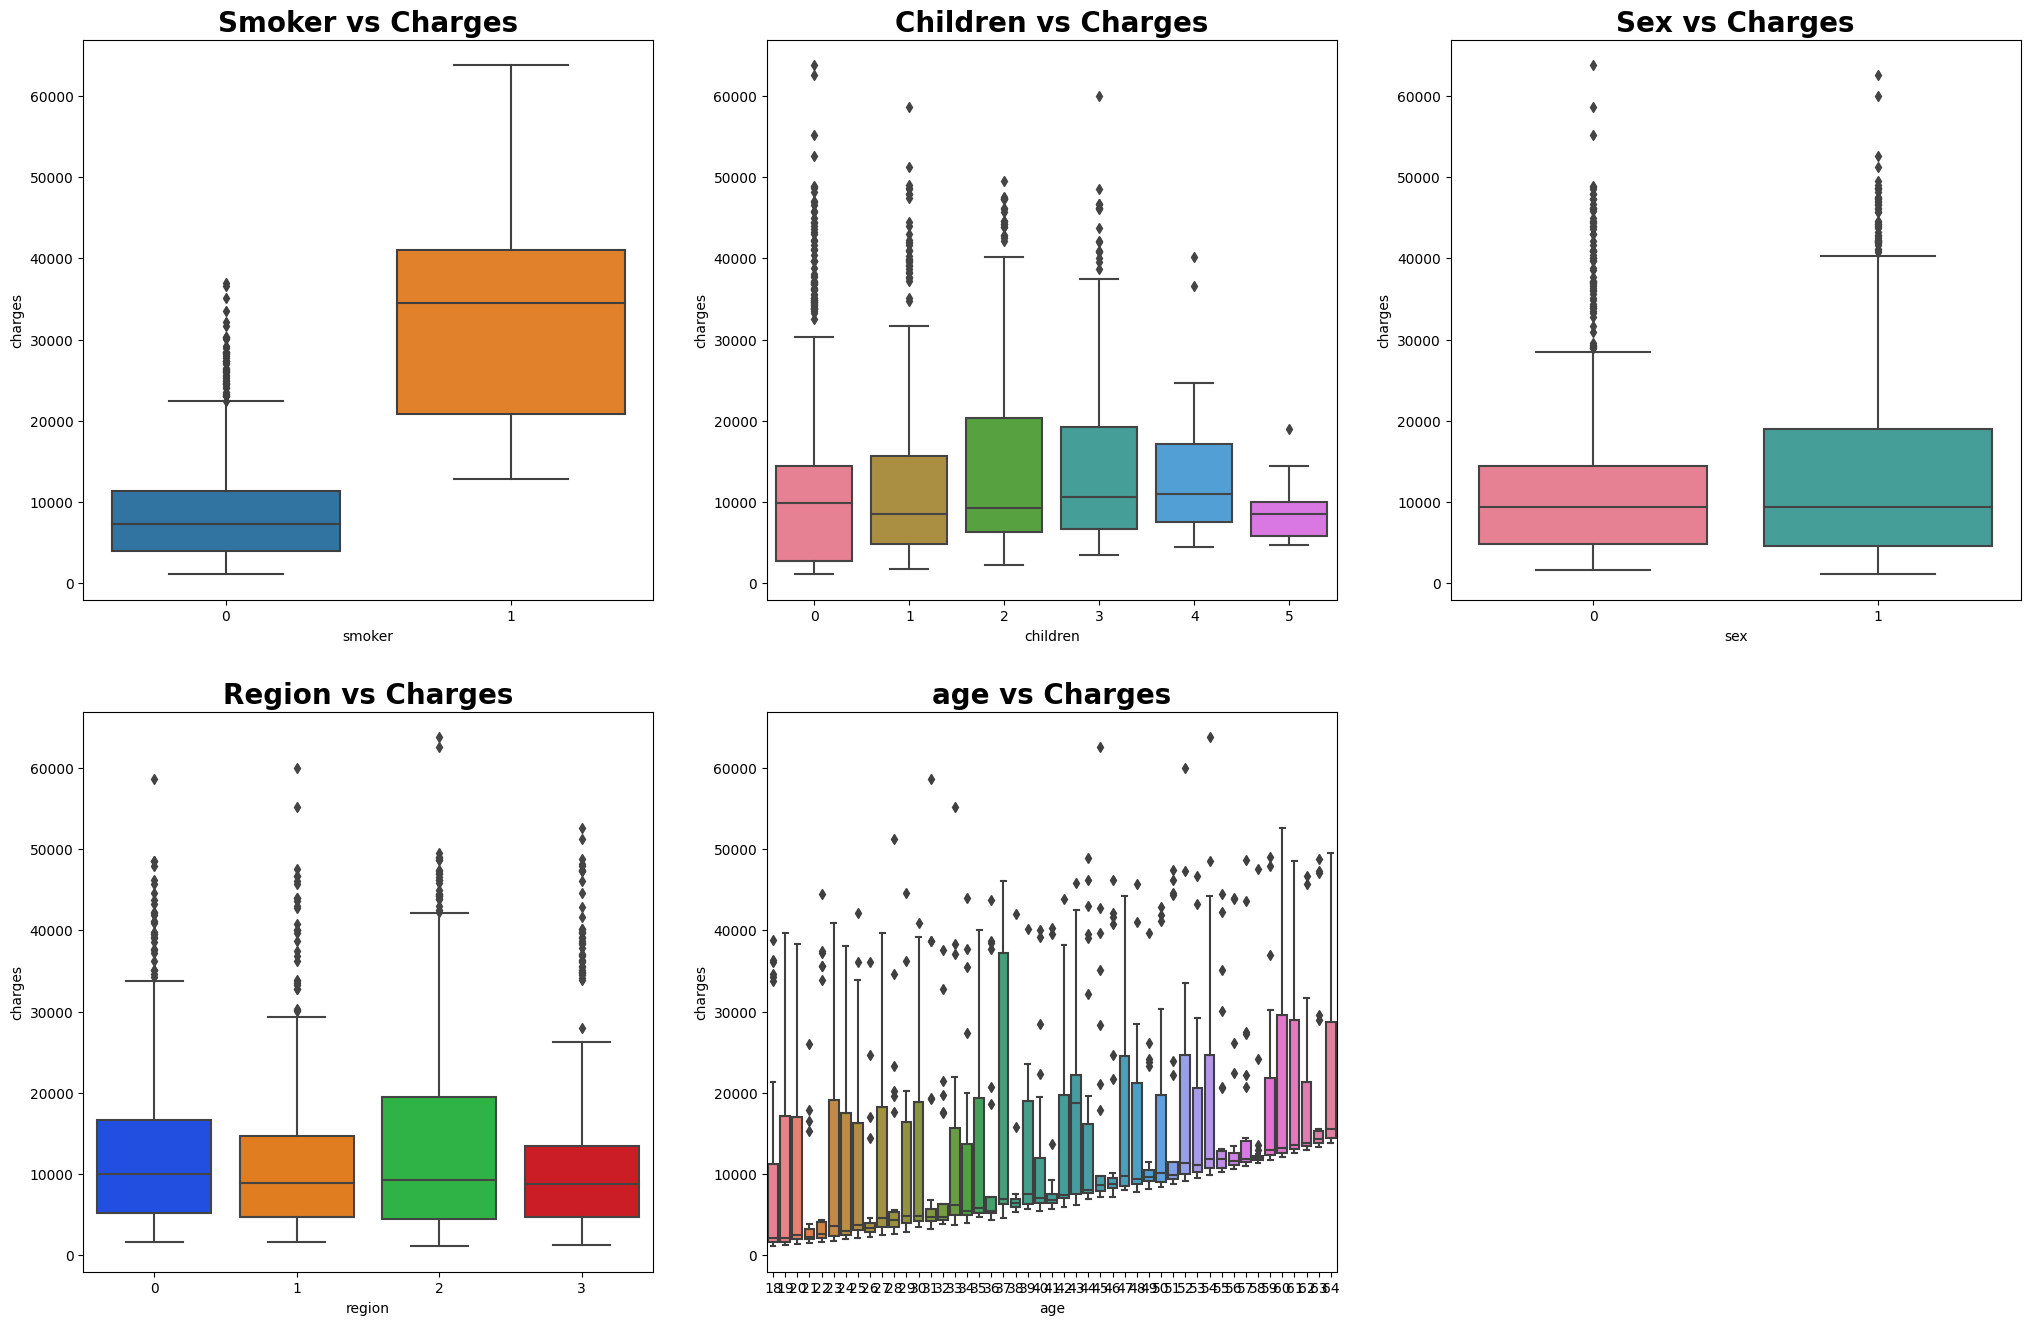

In [145]:
plt.figure(figsize=(25, 16))
plt.subplot(2,3,1)
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,2)
sns.boxplot(x = 'children', y = 'charges', data = df,palette="husl")
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,3)
sns.boxplot(x = 'sex', y = 'charges', data = df, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,4)
sns.boxplot(x = 'region', y = 'charges', data = df,palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,5)
sns.boxplot(x = 'age', y = 'charges', data = df, palette= 'husl')
plt.title('age vs Charges',fontweight="bold", size=20)
plt.show()

Yukarıdaki şemadan bunu görebiliyoruz.
1. Tıbbi Ücretler sigara içen için sigara içmeyenlere göre daha fazladır.
2. 
3. Cinisiyete göre bakıldığında erkeklerin kadınlara göre ücretleri daha fazladır.
4. Güneydoğu Bölgesinde Sağlık Ücretleri Daha Fazladır.
5. Yaşlı Yetişkinlerden daha fazla ücret alınır.

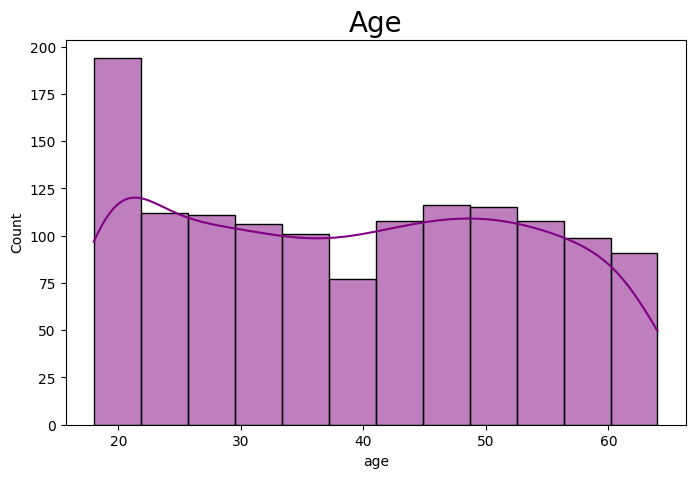

In [146]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='purple')
plt.title('Age', fontsize=20)
plt.show()

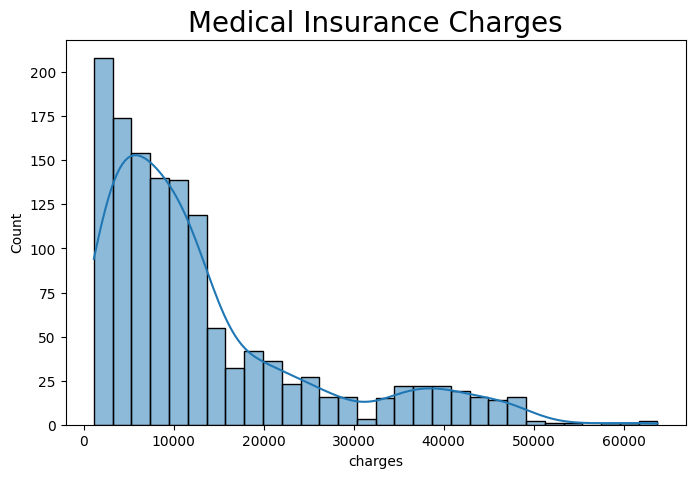

In [147]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('Medical Insurance Charges', fontsize=20)
plt.show()

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

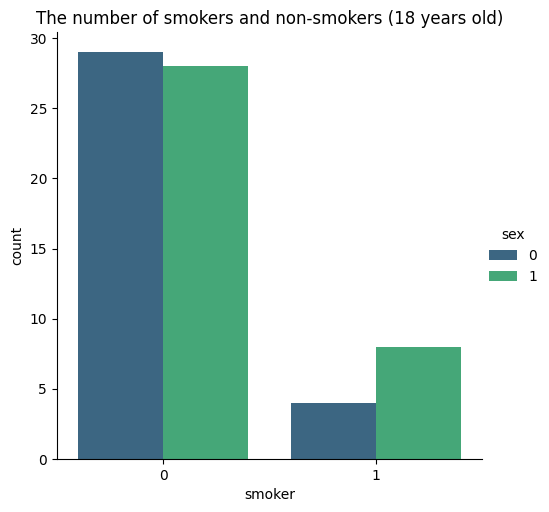

In [46]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="viridis", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

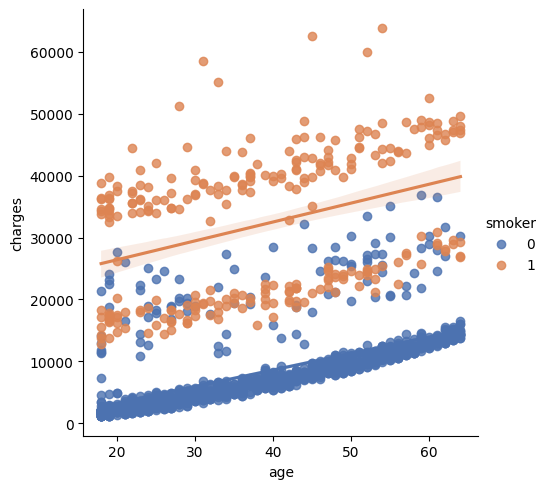

In [47]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette="deep")

Sigara içmeyenlerde yaş arttıkça tedavi maliyeti de artıyor. Bu mantıklı. Bu yüzden sağlığınıza dikkat edin arkadaşlar! Sigara içen kişilerde böyle bir bağımlılık görmüyoruz. Bunun sadece sigara içmede değil, aynı zamanda veri setinin özelliklerinde de olduğunu düşünüyorum. Sigaranın tedavi maliyeti üzerindeki bu kadar güçlü etkisine dair çok sayıda kayıt ve işaretin yer aldığı bir veri setine sahip olmak daha mantıklı olacaktır. Ama elimizdekilerle çalışıyoruz! Bmi'ye dikkat edelim. Bu rakamın hastaların tedavi maliyetini etkilemesine şaşırdım. Yoksa boşuna mı diyet yapıyoruz?

Belirli faktörleri (cinsiyet, sigara içme, çocuk sahibi olma) dikkate alarak bölgeye göre nasıl değiştiğini görelim.

In [54]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges = charges.head()

<AxesSubplot: xlabel='region', ylabel='charges'>

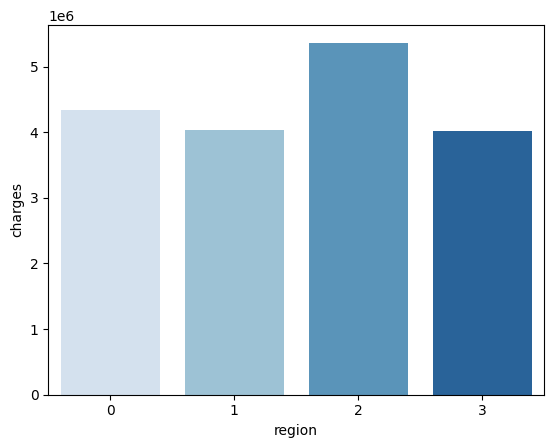

In [55]:
sns.barplot(x=charges.index, y=charges, palette='Blues')

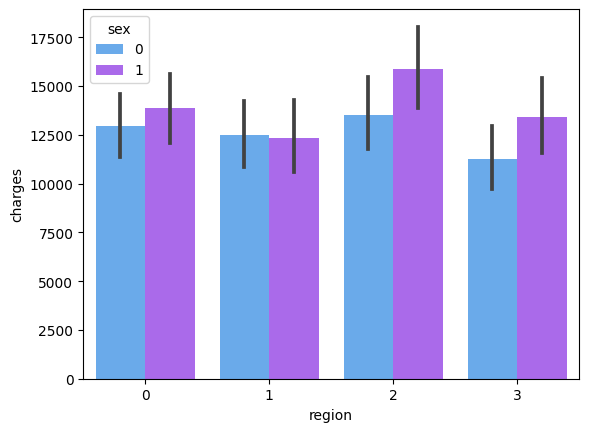

In [61]:
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

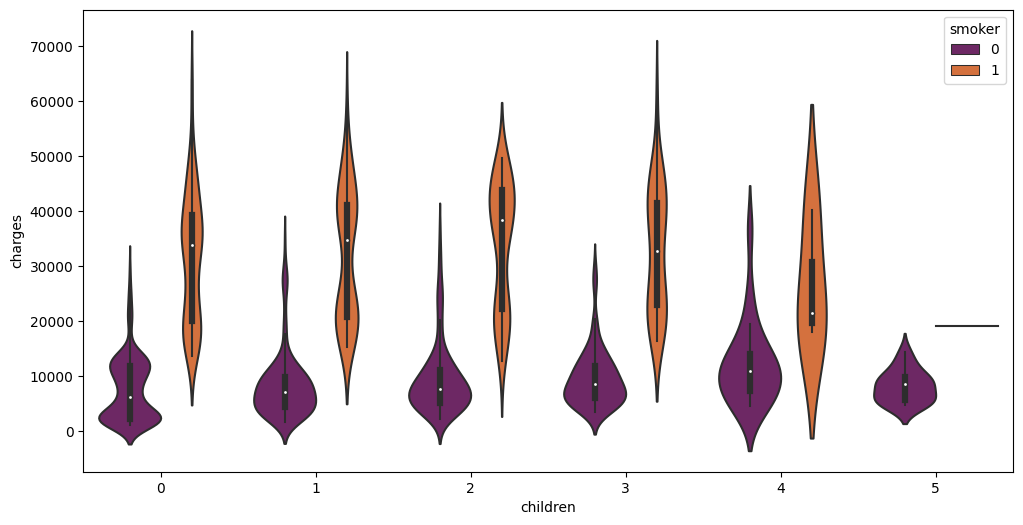

In [48]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='inferno')
plt.show()

Yukarıdaki grafikte, maliyetlerin yaş, vücut kitle indeksi ve çocuklarla birlikte artmasına rağmen, sigara içmenin tıbbi maliyetler üzerinde en yüksek etkiye sahip olduğunu görebiliriz. Ayrıca çocuğu olan kişiler genellikle daha az sigara içiyor

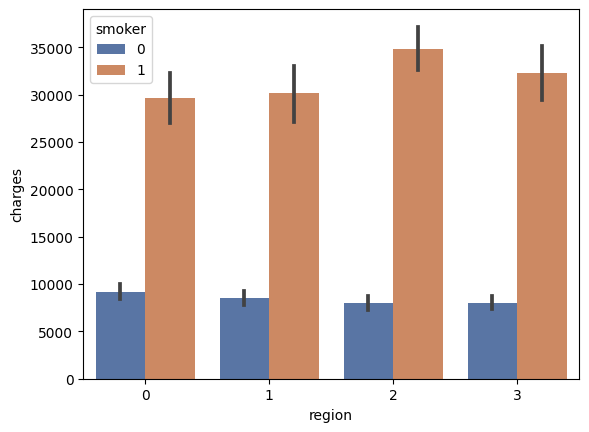

In [52]:
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='deep')

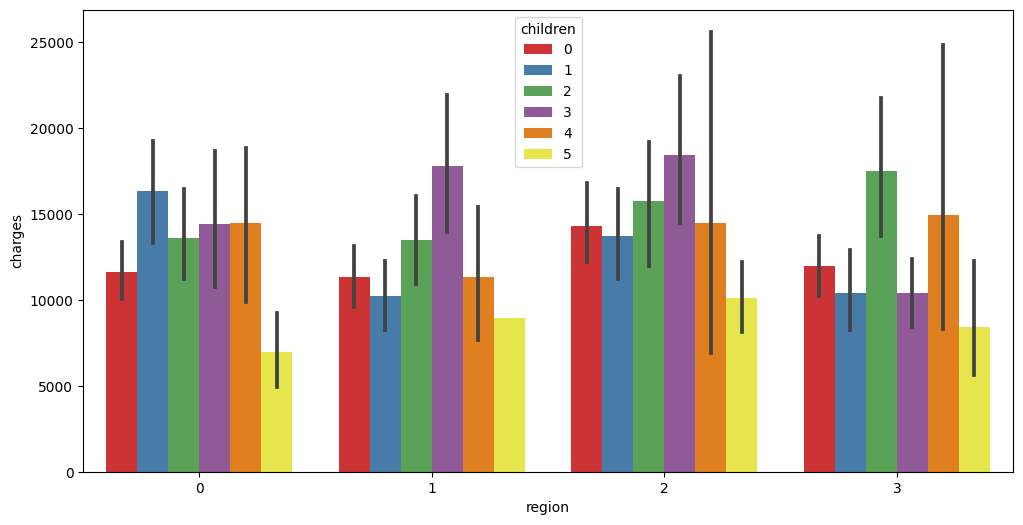

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')
plt.show()

Bu grafiklerden de görebileceğimiz gibi sigara içmeye bağlı en yüksek ücretler hâlâ Güneydoğu'da, en düşük olanlar ise Kuzeydoğu'da. Güneybatı'daki insanlar genellikle Kuzeydoğu'daki insanlardan daha fazla sigara içiyor, ancak Kuzeydoğu'daki insanlar cinsiyete göre Güneybatı ve Kuzeybatı'nın geneline göre daha yüksek sigara içiyor. Çocuklu kişilerin genel olarak tıbbi masrafları da daha yüksek oluyor

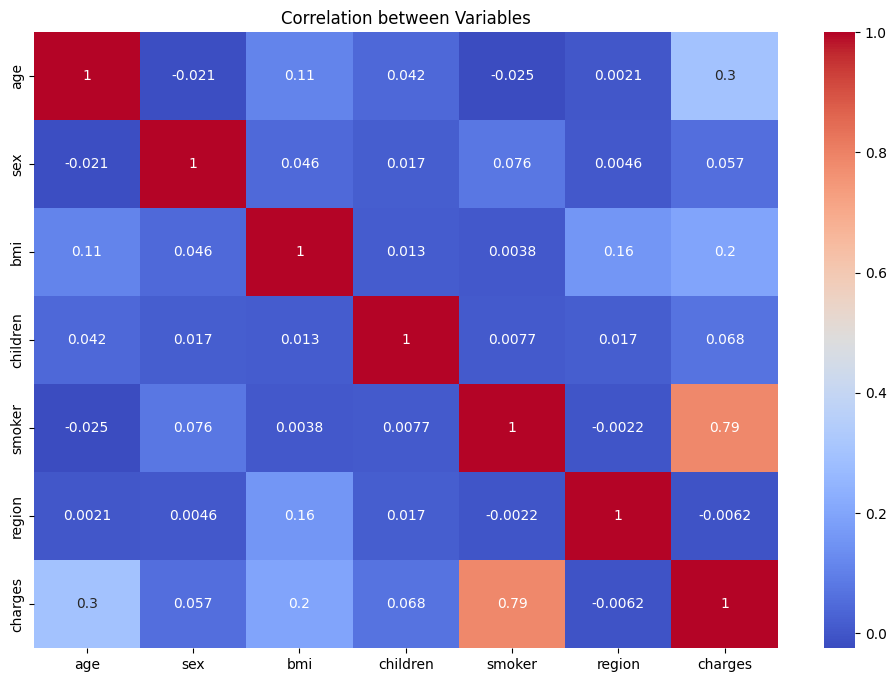

In [59]:
#Heatmap to see correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)
plt.title("Correlation between Variables")
plt.show()

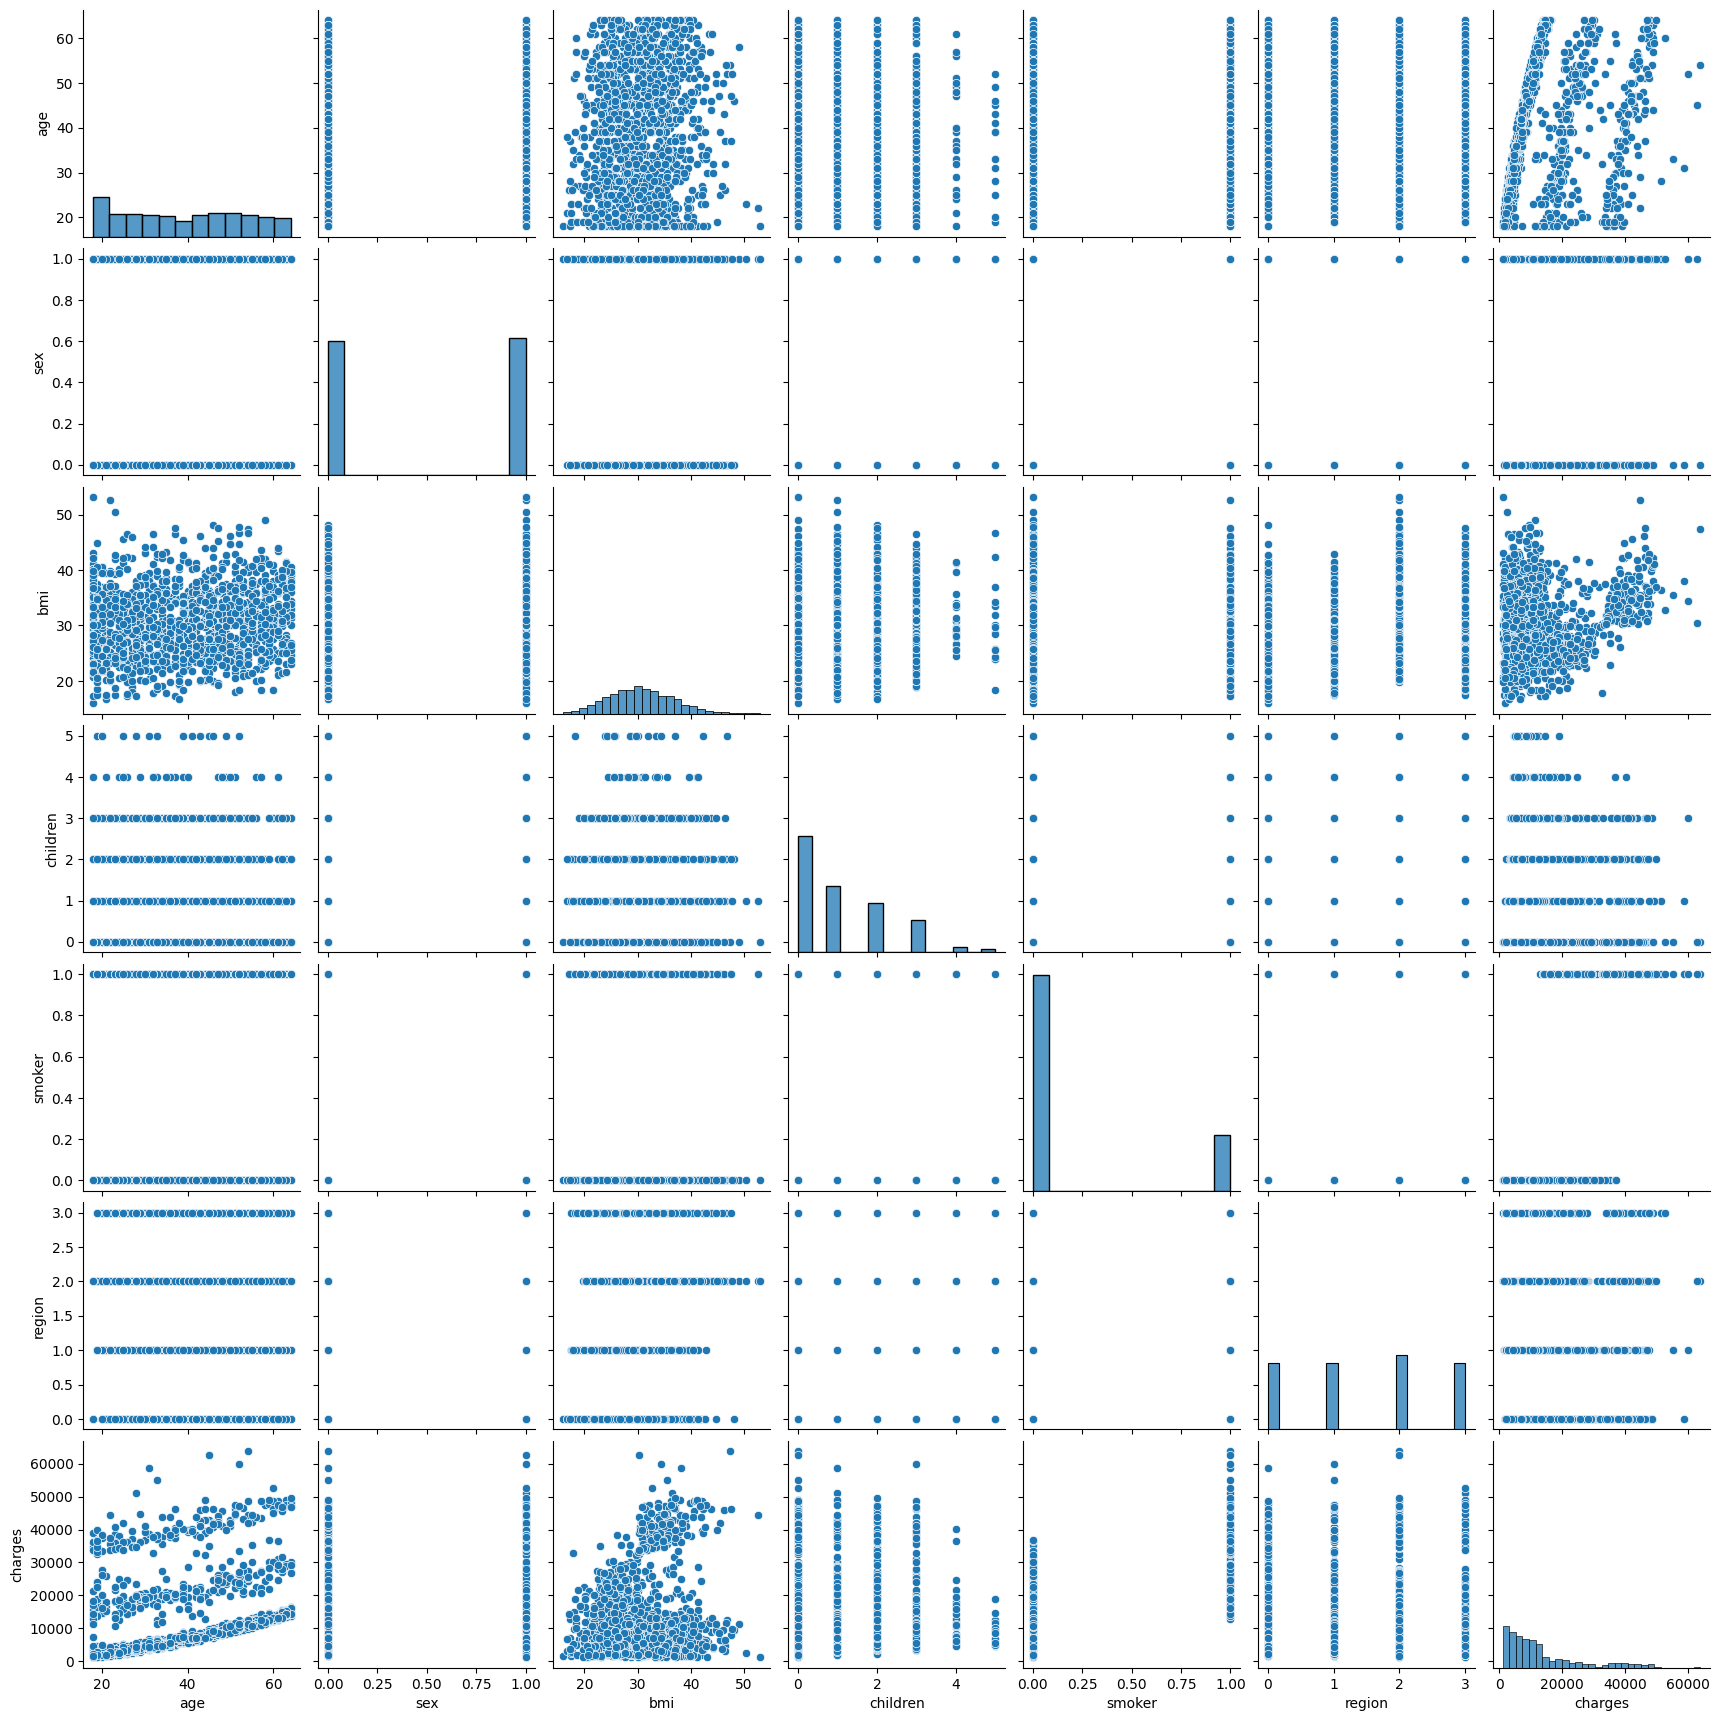

In [60]:
sns.pairplot(df)

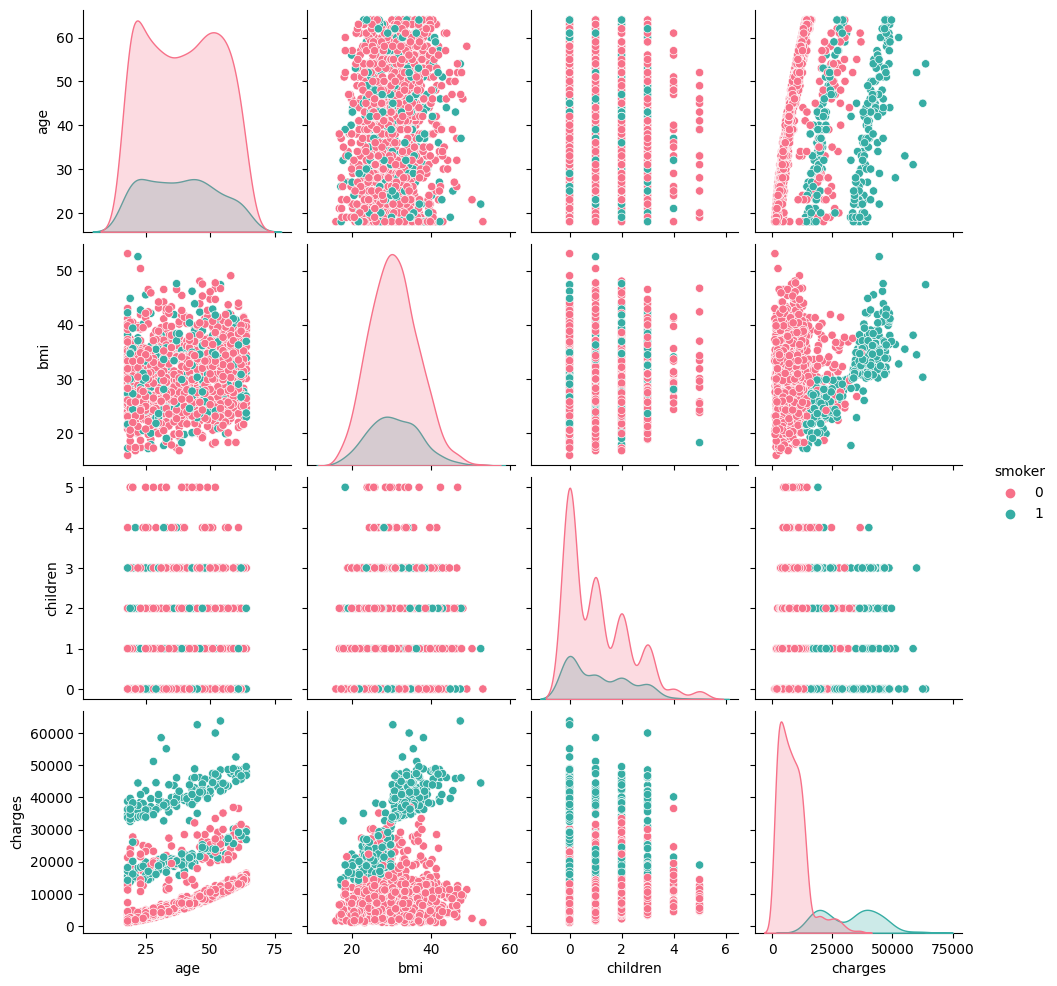

In [67]:
#Pairplot of all numerical variables
sns.pairplot(df, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()


Yukarıdaki tüm grafikleri analiz ettiğimizde şunu görebiliriz:

Yaş-yük grafiğinden, yüklerde bir artış eğilimi gözlemlenebilir.
BMI'nin ücretlerle bir miktar korelasyonu var gibi görünüyor.
Sigara içmekle tıbbi masraflar arasında güçlü bir ilişki var gibi görünüyor

In [69]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values

In [70]:
X[0:5]

array([[19.   ,  0.   , 27.9  ,  0.   ,  1.   ,  3.   ],
       [18.   ,  1.   , 33.77 ,  1.   ,  0.   ,  2.   ],
       [28.   ,  1.   , 33.   ,  3.   ,  0.   ,  2.   ],
       [33.   ,  1.   , 22.705,  0.   ,  0.   ,  1.   ],
       [32.   ,  1.   , 28.88 ,  0.   ,  0.   ,  1.   ]])

In [71]:
y = df['charges'].values

In [72]:
y[0:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

# Normalize

In [73]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [75]:
X[0:5]

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       [-0.4419476 ,  0.98959079, -1.30553108, -0.90861367, -0.5074631 ,
        -0.46691549],
       [-0.51314879,  0.98959079, -0.29255641, -0.90861367, -0.5074631 ,
        -0.46691549]])

# Train/test split

In [90]:
# train/test split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1070, 6) (1070,)
Test set: (268, 6) (268,)


# Build our model

# Linear Regression

In [100]:
# Modeli oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [103]:
print(model.coef_)
print(model.intercept_)

[ 3.61028043e+03 -9.39521400e+00  2.04689296e+03  5.12253132e+02
  9.54291505e+03 -2.99625864e+02]
13315.445192139769


In [104]:
# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Performans metriklerini hesaplayın
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [105]:
# Sonuçları bir tabloda saklayın
result_table = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 Score'],
    'Value': [mae, mse, rmse, r2]
})

# Sonuçları ekrana yazdırın
print(result_table)

     Metric         Value
0       MAE  4.186509e+03
1       MSE  3.363521e+07
2      RMSE  5.799587e+03
3  R2 Score  7.833463e-01


# Polynomial Regression

In [154]:
train = pd.DataFrame(df)

# Geri kalan kodu çalıştırabilirsiniz
X = train[['smoker']]
y_true = train['charges']
degree = 3

In [155]:
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_true)

LinearRegression()

In [159]:
y_pred_poly = poly_reg.predict(X_poly)

r2_poly = r2_score(y_true, y_pred_poly)
mae_poly = mean_absolute_error(y_true, y_pred_poly)
mse_poly = mean_squared_error(y_true, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print(f'R-squared (R2): {r2_poly}')
print(f'Mean Absolute Error (MAE): {mae_poly}')
print(f'Mean Squared Error (MSE): {mse_poly}')
print(f'Root Mean Squared Error (RMSE): {rmse_poly}')


R-squared (R2): 0.6195087957333016
Mean Absolute Error (MAE): 5680.440240873963
Mean Squared Error (MSE): 55758233.699703634
Root Mean Squared Error (RMSE): 7467.143610491473


C:\Users\victus\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


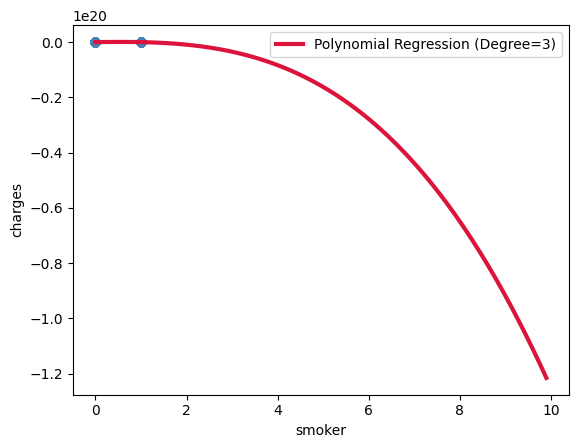

In [157]:
XX = np.arange(0.0, 10.0, 0.1)[:, np.newaxis]
yy = poly_reg.predict(poly.transform(XX))

plt.scatter(X, y_true, color="steelblue")
plt.plot(XX, yy, "crimson", linewidth=3, label=f'Polynomial Regression (Degree={degree})')
plt.xlabel("smoker")
plt.ylabel("charges")
plt.legend()
plt.show()

# Random Forest Regressor

Bu hatanın nedeni, RandomForestClassifier'ın tahmin yapmak için kullanılan etiketleri (y_train) uygun bir sınıflandırma problemi olarak algılamamasıdır. RandomForestClassifier, çok sınıflı sınıflandırma problemleri için tasarlanmıştır ve etiketlerin (labels) türü nominal (kategorik) olmalıdır.

Eğer bu modeli kullanarak regresyon yapmak istiyorsanız, RandomForestRegressor'ı kullanmalısınız. Eğer sınıflandırma yapmak istiyorsanız, etiketlerinizi uygun bir şekilde dönüştürmelisiniz. Eğer regresyon yapmak istiyorsanız ve etiketleriniz sürekli (continuous) ise, RandomForestRegressor'ı kullanmanız daha uygun olacaktır.

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor modelini oluşturun ve eğitin
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_test_pred = rfr.predict(X_test)

# Performansı değerlendirelim
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 5625.502116151983
Mean Squared Error (MSE): 52781199.28566113
Root Mean Squared Error (RMSE): 7265.067053073986
R-squared (R²): 0.66002170337567
